<a href="https://colab.research.google.com/github/FoodWiseCode/ML/blob/main/foodwise_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Rotten and Fresh between Fruits and Vegetables

Train a model that can classify fresh and rotten images of fruits and vegetables (apple, banana, cucumber, banana peel, eggshell, orange peel, orange, potato, and tomato). This project uses the CNN algorithm in TensorFlow that will extract the features of the images.

## Import Library

In [ ]:
import os
import cv2
import random
import shutil
from shutil import copyfile
import numpy as np

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
#tf.config.run_functions_eagerly(True)
#tf.compat.v1.disable_eager_execution()
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [ ]:
print(tf.__version__)

2.15.0


## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

# Specify the correct path
path = '/content/gdrive/My Drive/capstone-ml/coba-baru/dataset'

try:
    # Change the current working directory
    os.chdir(path)
    print(f"Current working directory changed to: {path}")

    # Now you can perform operations in the specified directory

except OSError as e:
    print(f"Error: {e}")


Current working directory changed to: /content/gdrive/My Drive/capstone-ml/coba-baru/dataset


In [ ]:
!ls /content/gdrive/MyDrive/capstone-ml/coba-baru

 dataset  'Salinan trytry.ipynb'


## Preparation

###  Split Dataset to Train, Test and Validation

In [ ]:
import os
import shutil

def make_dir(PATH):
    if not os.path.exists(PATH):
        os.makedirs(PATH)
    else:
        shutil.rmtree(PATH)
        os.makedirs(PATH)
    return PATH

In [ ]:
#Define Root directory
try:
  base_dir = 'dataset2'
  fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))

  print(f"Root directory: {base_dir}")
  print(f"Fruit directory: {fruit_dir}")

  train_dir = os.path.join(fruit_dir, 'train')
  validation_dir = os.path.join(fruit_dir, 'val')
  test_dir = os.path.join(fruit_dir,  'test')
  preview_dir = os.path.join(fruit_dir, 'preview')

  print(f"Train directory: {train_dir}")
  print(f"Validation directory: {validation_dir}")
  print(f"Test directory: {test_dir}")
  print(f"Preview directory: {preview_dir}")

  os.makedirs(train_dir)
  os.makedirs(validation_dir)
  os.makedirs(test_dir)
  os.makedirs(preview_dir)

  train_banana_peels_dir = os.path.join(train_dir, 'banana-peels')
  train_egg_shells_dir = os.path.join(train_dir, 'egg-shells')
  train_orange_peels_dir = os.path.join(train_dir, 'orange-peels')
  train_rotten_apples_dir = os.path.join(train_dir, 'rotten-apples')
  train_rotten_bananas_dir = os.path.join(train_dir, 'rotten-bananas')
  train_rotten_cucumbers_dir = os.path.join(train_dir, 'rotten-cucumbers')
  train_rotten_oranges_dir = os.path.join(train_dir, 'rotten-oranges')
  train_rotten_tomatoes_dir = os.path.join(train_dir, 'rotten-tomatoes')

  os.makedirs(train_banana_peels_dir)
  os.makedirs(train_egg_shells_dir)
  os.makedirs(train_orange_peels_dir)
  os.makedirs(train_rotten_apples_dir)
  os.makedirs(train_rotten_bananas_dir)
  os.makedirs(train_rotten_cucumbers_dir)
  os.makedirs(train_rotten_oranges_dir)
  os.makedirs(train_rotten_tomatoes_dir)

  validation_banana_peels_dir = os.path.join(validation_dir, 'banana-peels')
  validation_egg_shells_dir = os.path.join(validation_dir, 'egg-shells')
  validation_orange_peels_dir = os.path.join(validation_dir, 'orange-peels')
  validation_rotten_apples_dir = os.path.join(validation_dir, 'rotten-apples')
  validation_rotten_bananas_dir = os.path.join(validation_dir, 'rotten-bananas')
  validation_rotten_cucumbers_dir = os.path.join(validation_dir, 'rotten-cucumbers')
  validation_rotten_oranges_dir = os.path.join(validation_dir, 'rotten-oranges')
  validation_rotten_tomatoes_dir = os.path.join(validation_dir, 'rotten-tomatoes')

  os.makedirs(validation_banana_peels_dir)
  os.makedirs(validation_egg_shells_dir)
  os.makedirs(validation_orange_peels_dir)
  os.makedirs(validation_rotten_apples_dir)
  os.makedirs(validation_rotten_bananas_dir)
  os.makedirs(validation_rotten_cucumbers_dir)
  os.makedirs(validation_rotten_oranges_dir)
  os.makedirs(validation_rotten_tomatoes_dir)

  test_banana_peels_dir = os.path.join(test_dir, 'banana-peels')
  test_egg_shells_dir = os.path.join(test_dir, 'egg-shells')
  test_orange_peels_dir = os.path.join(test_dir, 'orange-peels')
  test_rotten_apples_dir = os.path.join(test_dir, 'rotten-apples')
  test_rotten_bananas_dir = os.path.join(test_dir, 'rotten-bananas')
  test_rotten_cucumbers_dir = os.path.join(test_dir, 'rotten-cucumbers')
  test_rotten_oranges_dir = os.path.join(test_dir, 'rotten-oranges')
  test_rotten_tomatoes_dir = os.path.join(test_dir, 'rotten-tomatoes')

  os.makedirs(test_banana_peels_dir)
  os.makedirs(test_egg_shells_dir)
  os.makedirs(test_orange_peels_dir)
  os.makedirs(test_rotten_apples_dir)
  os.makedirs(test_rotten_bananas_dir)
  os.makedirs(test_rotten_cucumbers_dir)
  os.makedirs(test_rotten_oranges_dir)
  os.makedirs(test_rotten_tomatoes_dir)

except OSError as e:
    print(f"Error: {e}")

Root directory: dataset2
Fruit directory: dataset2/fruit-dataset
Train directory: dataset2/fruit-dataset/train
Validation directory: dataset2/fruit-dataset/val
Test directory: dataset2/fruit-dataset/test
Preview directory: dataset2/fruit-dataset/preview


In [ ]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
        # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
        # img.save(os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
        # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
        # img.save(os.path.join(VALIDATION, filename))

In [ ]:
dataset_train_dir = '/content/gdrive/MyDrive/capstone-ml/coba-baru/dataset/train'
dataset_test_dir = '/content/gdrive/MyDrive/capstone-ml/coba-baru/dataset/test'

bananapeels_train_dir = os.path.join(dataset_train_dir, 'bananapeels')
eggshells_train_dir = os.path.join(dataset_train_dir, 'eggshells')
orangepeels_train_dir = os.path.join(dataset_train_dir, 'orangepeels')
rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
rcucumbers_train_dir = os.path.join(dataset_train_dir, 'rottencucumber')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')
rtomatoes_train_dir = os.path.join(dataset_train_dir, 'rottentamto')

bananapeels_test_dir = os.path.join(dataset_test_dir, 'bananapeels')
eggshells_test_dir = os.path.join(dataset_test_dir, 'eggshells')
orangepeels_test_dir = os.path.join(dataset_test_dir, 'orangepeels')
rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
rcucumbers_test_dir = os.path.join(dataset_test_dir, 'rottencucumber')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')
rtomatoes_test_dir = os.path.join(dataset_test_dir, 'rottentamto')

print('bananapeels_train images = ', len(os.listdir(bananapeels_train_dir)))
print('eggshells_train images = ', len(os.listdir(eggshells_train_dir)))
print('orangepeels_train images = ', len(os.listdir(orangepeels_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('rcucumbers_train images = ', len(os.listdir(rcucumbers_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print('rtomatoes_train images = ', len(os.listdir(rtomatoes_train_dir)))

print()
print('bananapeels_test images = ', len(os.listdir(bananapeels_test_dir)))
print('eggshells_test images = ', len(os.listdir(eggshells_test_dir)))
print('orangepeels_test images = ', len(os.listdir(orangepeels_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('rcucumbers_test images = ', len(os.listdir(rcucumbers_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))
print('rtomatoes_test images = ', len(os.listdir(rtomatoes_test_dir)))

In [ ]:
SPLIT_SIZE = .7 # 0.67 #0.2
split_data(bananapeels_train_dir, train_banana_peels_dir, validation_banana_peels_dir, SPLIT_SIZE)
split_data(eggshells_train_dir, train_egg_shells_dir, validation_egg_shells_dir, SPLIT_SIZE)
split_data(orangepeels_train_dir, train_orange_peels_dir, validation_orange_peels_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_bananas_dir, validation_rotten_bananas_dir, SPLIT_SIZE)
split_data(rcucumbers_train_dir, train_rotten_cucumbers_dir, validation_rotten_cucumbers_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_oranges_dir, validation_rotten_oranges_dir, SPLIT_SIZE)
split_data(rtomatoes_train_dir, train_rotten_tomatoes_dir, validation_rotten_tomatoes_dir, SPLIT_SIZE)

SPLIT_SIZE = 1 #1 #0.5
split_data(bananapeels_test_dir, test_banana_peels_dir, validation_banana_peels_dir, SPLIT_SIZE)
split_data(eggshells_test_dir, test_egg_shells_dir, validation_egg_shells_dir, SPLIT_SIZE)
split_data(orangepeels_test_dir, test_orange_peels_dir, validation_orange_peels_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_bananas_dir, validation_rotten_bananas_dir, SPLIT_SIZE)
split_data(rcucumbers_test_dir, test_rotten_cucumbers_dir, validation_rotten_cucumbers_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_oranges_dir, validation_rotten_oranges_dir, SPLIT_SIZE)
split_data(rtomatoes_test_dir, test_rotten_tomatoes_dir, validation_rotten_tomatoes_dir, SPLIT_SIZE)

In [ ]:
print(len(os.listdir('dataset2/fruit-dataset/train/banana-peels/')))
print(len(os.listdir('dataset2/fruit-dataset/train/egg-shells/')))
print(len(os.listdir('dataset2/fruit-dataset/train/orange-peels/')))
print(len(os.listdir('dataset2/fruit-dataset/train/rotten-apples/')))
print(len(os.listdir('dataset2/fruit-dataset/train/rotten-bananas/')))
print(len(os.listdir('dataset2/fruit-dataset/train/rotten-cucumbers/')))
print(len(os.listdir('dataset2/fruit-dataset/train/rotten-oranges/')))
print(len(os.listdir('dataset2/fruit-dataset/train/rotten-tomatoes/')))
print()
print(len(os.listdir('dataset2/fruit-dataset/val/banana-peels/')))
print(len(os.listdir('dataset2/fruit-dataset/val/egg-shells/')))
print(len(os.listdir('dataset2/fruit-dataset/val/orange-peels/')))
print(len(os.listdir('dataset2/fruit-dataset/val/rotten-apples/')))
print(len(os.listdir('dataset2/fruit-dataset/val/rotten-bananas/')))
print(len(os.listdir('dataset2/fruit-dataset/val/rotten-cucumbers/')))
print(len(os.listdir('dataset2/fruit-dataset/val/rotten-oranges/')))
print(len(os.listdir('dataset2/fruit-dataset/val/rotten-tomatoes/')))
print()
print(len(os.listdir('dataset2/fruit-dataset/test/banana-peels/')))
print(len(os.listdir('dataset2/fruit-dataset/test/egg-shells/')))
print(len(os.listdir('dataset2/fruit-dataset/test/orange-peels/')))
print(len(os.listdir('dataset2/fruit-dataset/test/rotten-apples/')))
print(len(os.listdir('dataset2/fruit-dataset/test/rotten-bananas/')))
print(len(os.listdir('dataset2/fruit-dataset/test/rotten-cucumbers/')))
print(len(os.listdir('dataset2/fruit-dataset/test/rotten-oranges/')))
print(len(os.listdir('dataset2/fruit-dataset/test/rotten-tomatoes/')))

84
73
101
2267
2046
295
1117
1278

36
31
43
971
876
126
478
547

30
26
36
988
900
255
403
353


### Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=0.2, #0.2, # 0.2, 0.5, [0.5,1.0]
    rotation_range=40, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

### Preview Augmentation

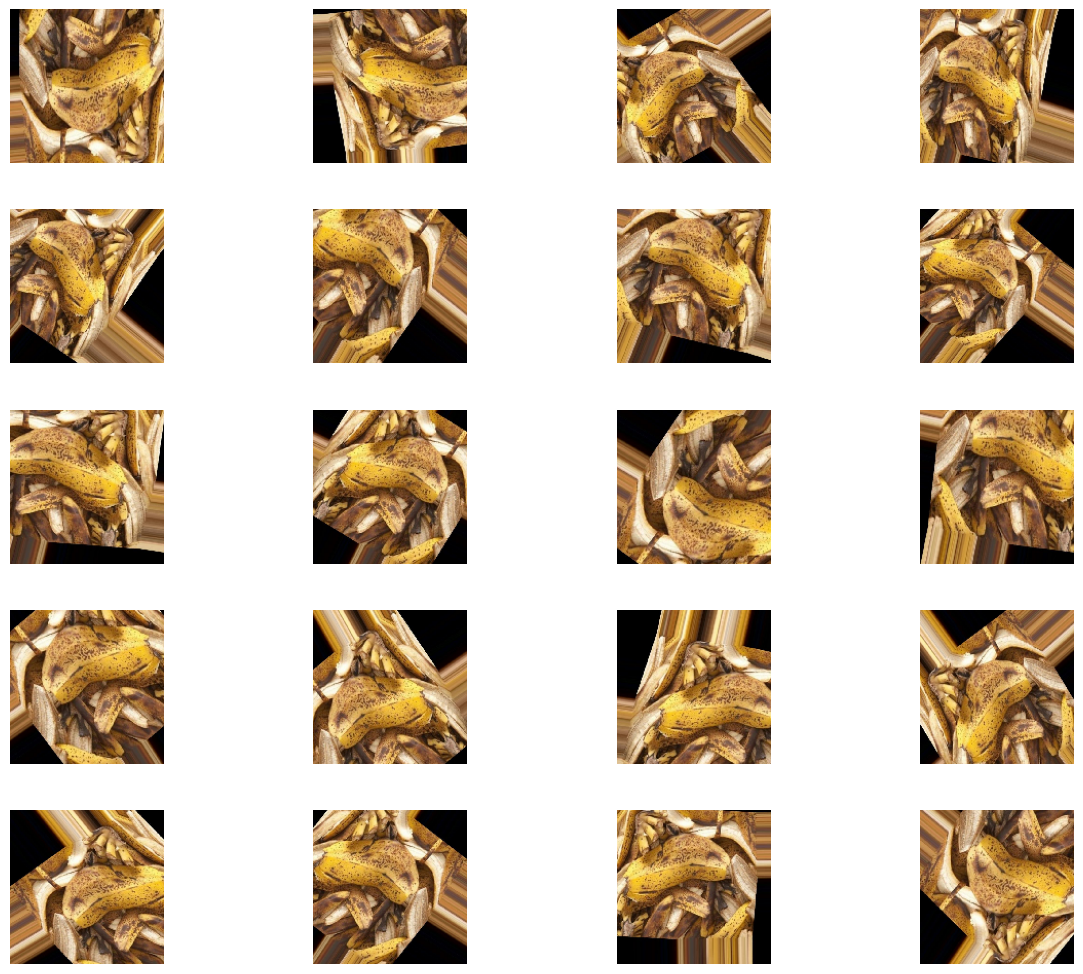

In [ ]:
path_aug = os.path.join(train_banana_peels_dir, os.listdir(train_banana_peels_dir)[-1])
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
    plt.subplot(int((len(preview_img)/4)+1), 4, n+1)  # Convert to integer
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                              color_mode="rgb",
                              target_size=(150, 150), #target_size=(150, 150)
                              interpolation="nearest"))
    plt.axis('off')
plt.show()


for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

### Image Data Generator

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(150,150), #? #target_size=(150, 150)
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(150,150), #? #target_size=(150, 150)
                                                         class_mode='categorical')

Found 7261 images belonging to 8 classes.
Found 3108 images belonging to 8 classes.


### Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

### Sequential Model (Baseline)

In [ ]:
#build model
base_model_seq = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)), #64
    # This is the second convolution
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), #128
    # This is the third convolution
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'), #256
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), #512
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(8, activation='softmax')
])

base_model_seq.compile(loss='categorical_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   metrics=['accuracy'])

base_model_seq.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 256)      

In [ ]:
model_image = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
model_image.trainable = False

model = tf.keras.models.Sequential([
    model_image,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(14, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_6 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0 

In [ ]:
train_len = 0
for foldername in os.listdir('dataset2/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('dataset2/fruit-dataset/train',foldername)))

val_len = 0
for foldername in os.listdir('dataset2/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('dataset2/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)


7261
3108


In [ ]:
history = base_model_seq.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=8,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)

Epoch 1/8
226/226 [==============================] - 1353s 6s/step - loss: 1.0510 - accuracy: 0.6270 - val_loss: 0.7464 - val_accuracy: 0.7375
Epoch 2/8
226/226 [==============================] - 1326s 6s/step - loss: 0.5926 - accuracy: 0.8086 - val_loss: 0.4537 - val_accuracy: 0.8465
Epoch 3/8
226/226 [==============================] - 1326s 6s/step - loss: 0.4526 - accuracy: 0.8481 - val_loss: 0.3622 - val_accuracy: 0.8842
Epoch 4/8
226/226 [==============================] - 1309s 6s/step - loss: 0.3658 - accuracy: 0.8795 - val_loss: 0.3400 - val_accuracy: 0.8803
Epoch 5/8
226/226 [==============================] - 1316s 6s/step - loss: 0.3209 - accuracy: 0.8937 - val_loss: 0.2713 - val_accuracy: 0.9160
Epoch 6/8
227/226 [==============================] - ETA: 0s - loss: 0.2828 - accuracy: 0.9087
Reached 98% accuracy. Stop Training
226/226 [==============================] - 1325s 6s/step - loss: 0.2828 - accuracy: 0.9087 - val_loss: 0.2317 - val_accuracy: 0.9254


In [ ]:
base_model_seq.save('model-images2.h5')

### Plot Loss and Accuracy

<Figure size 640x480 with 0 Axes>

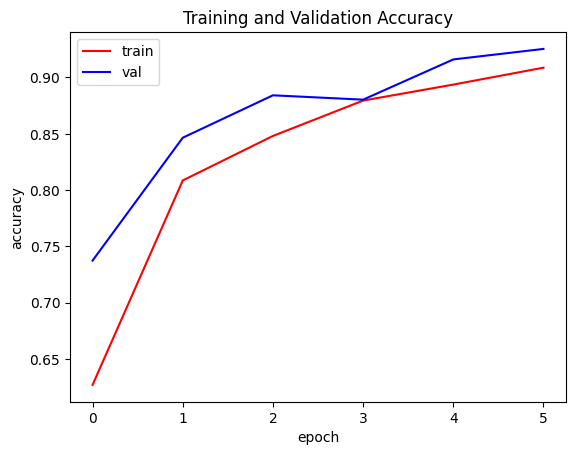

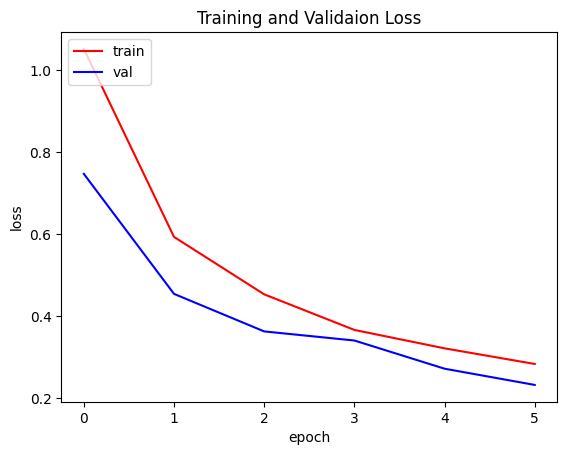

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy'] #history
val_acc = history.history['val_accuracy'] #history
loss = history.history['loss'] #history
val_loss = history.history['val_loss'] #history

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

### Evaluate Model

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150), #target_size=(150, 150)
                                                  shuffle = False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)
#model = model

loss, acc = base_model_seq.evaluate(test_generator, steps = nb_samples, verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 2991 images belonging to 8 classes.
2991/2991 [==============================] - 188s 63ms/step - loss: 0.2027 - accuracy: 0.9351
accuracy test:  0.9351387619972229
loss test:  0.20274518430233002


### Save Model

### Predict Image

Saving Copy of IMG_20200729_164157.jpg_0_3979.jpg to Copy of IMG_20200729_164157.jpg_0_3979.jpg
1/1 [==============================] - 0s 93ms/step


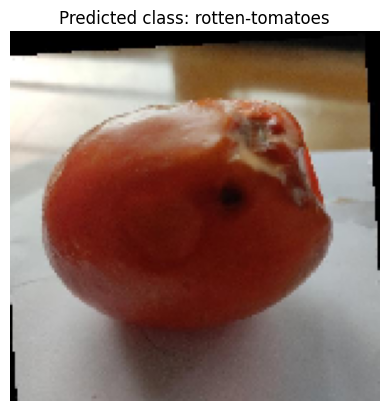

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load your pre-trained model
model_predict = tf.keras.models.load_model('/content/gdrive/My Drive/capstone-ml/model-images2.h5')
model_predict.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Upload multiple images
uploaded = files.upload()

# Class names for your categories
class_names = ['banana-peels', 'egg-shells', 'orange-peels', 'rotten-apples', 'rotten-bananas', 'rotten-cucumbers', 'rotten-oranges', 'rotten-tomatoes']

# Loop through each uploaded image
for fn in uploaded.keys():
    # Load the image
    img = image.load_img(fn, color_mode="rgb", target_size=(150, 150), interpolation="nearest") #target_size=(160, 160)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255

    # Get predictions for the image
    predictions = model_predict.predict(img, batch_size=10)

    # Get the predicted class
    predicted_class = np.argmax(predictions)

    # Check if predicted_class is within the valid range
    if 0 <= predicted_class < len(class_names):
        # Get the class label for the predicted class
        predicted_label = class_names[predicted_class]

        # Display the image and prediction result
        plt.imshow(image.load_img(fn, color_mode="rgb", target_size=(150, 150), interpolation="nearest")) #target_size=(150, 150)
        plt.title(f"Predicted class: {predicted_label}")
        plt.axis('off')
        plt.show()
    else:
        print("Predicted class index is out of bounds.")


In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 56.1 MB/s eta 0:00:00


In [ ]:
import tensorflowjs as tfjs

model = tf.keras.models.load_model('/content/gdrive/My Drive/capstone-ml/coba-baru/dataset/model-images2.h5')

tfjs.converters.save_keras_model(model, '/content/gdrive/My Drive/capstone-ml/coba-baru/dataset/model-images2.json')